In [1]:
import json
import time
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt


In [2]:

## Part I

%matplotlib inline

loginf = open('./logins.json', "r")
logins = json.load(loginf)
    
logins_data_df = pd.DataFrame(columns=['login_time'], data=logins)
#logins_data_df['loginSlot'] = 0
logins_data_df['login_count'] = 1;
#print(logins_data_df)

login_time_list = []
for i in range(len(logins_data_df)) :
    time1 = pd.Timestamp(logins_data_df['login_time'].iloc[i])
    logins_data_df['login_time'].at[i] = (time1 - pd.Timestamp("1970-01-01 00:00:00")) // pd.Timedelta('900s')
login_df1 = pd.DataFrame(columns=['login_count'], data=logins_data_df.groupby(['login_time']).count())
print("888", len(login_df1))
login_time_unique_df = logins_data_df['login_time'].unique() 
print("999", login_time_unique_df)
login_df1['login_time'] = login_time_unique_df
print(login_df1)

# login_df1 has two colums: login_time and login_count
# login_time signifies the nth 15 minute interval since 1970-01-01 00:00:00
# login count specifies the number of users logged in at login_time 15 minute interval )


888 9381
999 [80 81 82 ... 9865 9866 9867]
            login_count login_time
login_time                        
80                    2         80
81                    6         81
82                    9         82
83                    7         83
84                    1         85
...                 ...        ...
9863                  5       9863
9864                  5       9864
9865                  2       9865
9866                  7       9866
9867                  6       9867

[9381 rows x 2 columns]


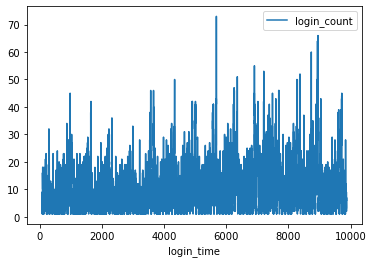

In [3]:
login_df1.plot(kind='line', x='login_time',  y='login_count')
plt.show()


In [4]:
### Part II ‐ Experiment and metrics design
'''
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
    1. What would you choose as the key measure of success of this experiment in 
       encouraging driver partners to serve both cities, and why would you choose this metric?
        - encourage a driver who is free and nearest to the bridge to take a ride to the other city 
          if there is demand in the other city. 
        - A driver who is at the far end (from the bridge) can take a ride from nearest to his
          location
        - A driver who is midway in the city, can take a ride from other city if there is
          low demand in his location (city) and high demand in the other city.
        - Since the demands are going to be based on teh circadian rhythms, the rules for taking rides
          from the other cities will be most beneficial in teh eveninga and mornings. In praticular
            the drivers from Metropolis will start taking rides from Gotham, startingnight time and the
            drivers from Gothan will start taking rides from Metropolis starting mornings, until 
            the demand in the city to which the drivers have transitioned, is met to a good gegree.
          
    2. Describe a practical experiment you would design to compare the effectiveness of 
       the proposed change in relation to the key measure of success. Please provide details on:
        a. how you will implement the experiment
        b. what statistical test(s) you will conduct to verify the significance of the observation
        c. how you would interpret the results and provide recommendations to the city operations 
           team along with any caveats.
            
        - The experiment will be implemented by measuring demand in each city (particularly) near
        the transition times (mornings ad evenings). If there is demand that is not met in a city,
        the drivers from other city will be compensated for toll for taking rides to/from other cities.
        
        - We can measure/calculate various metrics such as 
        1. Total revenue under existing conditions as against revenue when the experiment is 
        implemented
        2. Total number of rides under existing and new conditions
        3. Total wait time for customers
        4. Average earnings per driver
        
'''
        

'\nThe neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on\nweekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active\nduring the day. On weekends, there is reasonable activity in both cities.\n\nHowever, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend\nto be exclusive to each city. The Ultimate managers of city operations for the two cities have\nproposed an experiment to encourage driver partners to be available in both cities, by\nreimbursing all toll costs.\n    1. What would you choose as the key measure of success of this experiment in \n       encouraging driver partners to serve both cities, and why would you choose this metric?\n        - encourage a driver who is free and nearest to the bridge to take a ride to the other city \n          if there is demand in the other city. \n        - A driver who is at the far end (from the bridge) can take a ride from nearest to his\

In [5]:
## Part III

dataf = open('./ultimate_data_challenge.json', "r")
datastr = json.load(dataf)

# infer_dates=['signup_date', 'last_trip_date']
challenge_data_df = pd.DataFrame(columns=['city', 'phone', 'trips_in_first_30_days', \
    'signup_date', 'avg_rating_of_driver', 'avg_surge', 'last_trip_date', \
    'surge_pct', 'ultimate_black_user', 'weekday_pct', \
    'avg_dist', 'avg_rating_by_driver'], data=datastr)

print("111 ", len(challenge_data_df))
print(challenge_data_df)



111  50000
                 city    phone  trips_in_first_30_days signup_date  \
0      King's Landing   iPhone                       4  2014-01-25   
1             Astapor  Android                       0  2014-01-29   
2             Astapor   iPhone                       3  2014-01-06   
3      King's Landing   iPhone                       9  2014-01-10   
4          Winterfell  Android                      14  2014-01-27   
...               ...      ...                     ...         ...   
49995  King's Landing   iPhone                       0  2014-01-25   
49996         Astapor   iPhone                       1  2014-01-24   
49997      Winterfell  Android                       0  2014-01-31   
49998         Astapor   iPhone                       2  2014-01-14   
49999         Astapor  Android                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date  surge_pct  \
0                       4.7       1.10     2014-06-17       15.4   
1           

In [6]:
### Part 3 ‐ Predictive modeling
'''
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long-term rider retention (again, a few sentences will suffice).
'''

'\nUltimate is interested in predicting rider retention. To help explore this question, we have\nprovided a sample dataset of a cohort of users who signed up for an Ultimate account in\nJanuary 2014. The data was pulled several months later; we consider a user retained if they\nwere “active” (i.e. took a trip) in the preceding 30 days.\n\nWe would like you to use this data set to help understand what factors are the best predictors\nfor retention, and offer suggestions to operationalize those insights to help Ultimate.\n\nThe data is in the attached file ultimate_data_challenge.json. See below for a detailed\ndescription of the dataset. Please include any code you wrote for the analysis and delete the\ndataset when you have finished with the challenge.\n\n1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided\ndata for this analysis (a few sentences/plots describing your approach will suffice). What\nfraction of the observed users were retained?\n\n2. 

In [7]:
'''
Data cleaning
  'city', 'phone', 'trips_in_first_30_days', 
    'signup_date', 'avg_rating_of_driver', 'avg_surge', 'last_trip_date', 
    'surge_pct', 'ultimate_black_user', 'weekday_pct', 
    'avg_dist', 'avg_rating_by_driver'

 -If City is NULL or NaN convert to "Shangrila"
 -Ignore signup date as this is not likely to systematically affect retention
 -'phone is a categorical variable - can encode as  one-hot vector
 -If 'avg_rating_of_driver' if NaN - drop row - This is an important variable and putting 
     an arbitrary value such as 0 or 0-1 will give biased inference
 -The same is true for 'avg_rating_by_driver'
 -If 'avg_surge' is NaN or missing, put it as 1.0
 -Drop the record if 'last_trip_date' is missing or NaN. This is important since it will 
     be converted to target categorical variable 'retention"
 -'ultimate_black_user' is a categorical variable
 -'avg_dist - if missing or NaN replace my mean(avg_dist) over the whole population
 -'weekday_pct - if missing or NaN replace my mean(weekday_pct) over the whole population
 '''



'\nData cleaning\n  \'city\', \'phone\', \'trips_in_first_30_days\', \n    \'signup_date\', \'avg_rating_of_driver\', \'avg_surge\', \'last_trip_date\', \n    \'surge_pct\', \'ultimate_black_user\', \'weekday_pct\', \n    \'avg_dist\', \'avg_rating_by_driver\'\n\n -If City is NULL or NaN convert to "Shangrila"\n -Ignore signup date as this is not likely to systematically affect retention\n -\'phone is a categorical variable - can encode as  one-hot vector\n -If \'avg_rating_of_driver\' if NaN - drop row - This is an important variable and putting \n     an arbitrary value such as 0 or 0-1 will give biased inference\n -The same is true for \'avg_rating_by_driver\'\n -If \'avg_surge\' is NaN or missing, put it as 1.0\n -Drop the record if \'last_trip_date\' is missing or NaN. This is important since it will \n     be converted to target categorical variable \'retention"\n -\'ultimate_black_user\' is a categorical variable\n -\'avg_dist - if missing or NaN replace my mean(avg_dist) over t

In [8]:
# Find Max date in the 'last_trip_date'. 
# We will assign a user is retained if S/he has taken a ride in the 30 days preceding this last date.
#

len_database = len(challenge_data_df)
print("len challenge_database = ", len_database)

ts = challenge_data_df['last_trip_date']

date1 = pd.to_datetime(challenge_data_df['last_trip_date'].iloc[0])
for i in range(1, len_database) :
    date2 = pd.to_datetime(challenge_data_df['last_trip_date'].iloc[i])
    if (date2 < date1) :
        date1 = date2
        
last_database_datetime = date2
print("last_database_datetime = ", last_database_datetime)
retained = 0
for i in range(len_database) :
    last_trip_date_time =  pd.to_datetime(challenge_data_df['last_trip_date'].iloc[i])
    days_since_last_trip = (last_database_datetime - last_trip_date_time) // pd.Timedelta('86400s')
    if (days_since_last_trip < 30)  :
            retained = retained + 1

print("Fraction retained = ", retained*100.0/len_database)

len challenge_database =  50000
last_database_datetime =  2014-04-20 00:00:00
Fraction retained =  65.06


In [9]:
### Part III cont.
# There are a few important continuous variables such as avg_dist, avg_rating_by_driver, 
# avg_rating_of_driver, trips_in_first_30_days, weekday_pct: and the target is binary,
# so logistic regresion seems to be a good model. 

# When we train the model we get weights for the features. Higher the weights, more important
# is the variable. Off course we need to take care of normalization of the input variable. 